# Certificate printing



In [1]:
import sys

import wand.color
import wand.display

sys.path.insert(1, '/util')
from util.entities import *
from os import listdir
from os.path import isfile, join

## Values

In [2]:
toUpperFolder = './../'
folder = f'{toUpperFolder}///fall_2022///'
certificate_folder = f'{folder}///certificates_sheets///'
save_folder = f'{folder}///new_certificates///'
data_path = f'{folder}///reg.csv'
font_folder = f'{toUpperFolder}///fonts'

## Certificate-under-sheet reading

Created certificate: ./..////fall_2022//////certificates_sheets///diplom.pdf
w: 595.27572, h: 841.88972


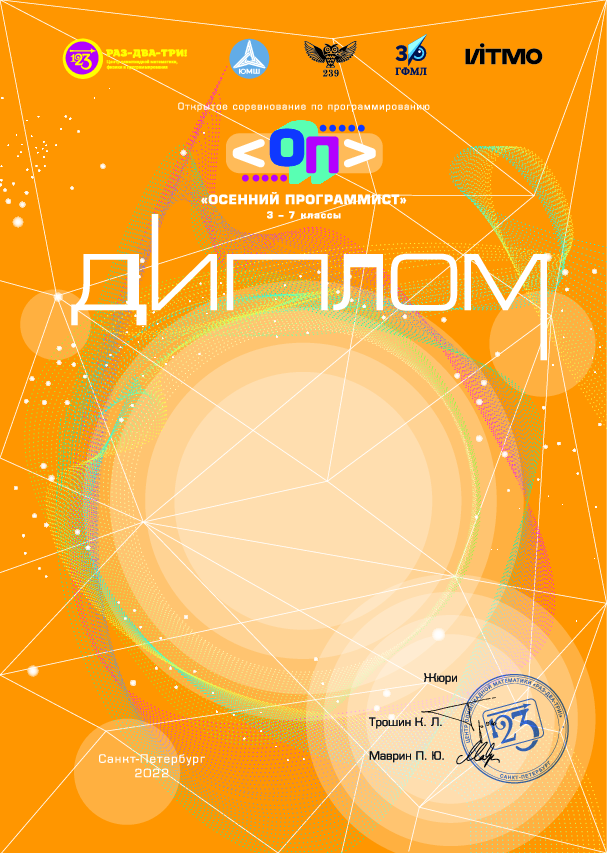

In [3]:
certificate_files = get_file_names_from_folder(certificate_folder, ".pdf")

certificates = list(map((
    lambda file_name: CertificateUnderSheet(pdf_path=(certificate_folder + file_name))), certificate_files))

image_from_pdf_folder(certificate_folder)

## Results reading

In [4]:
# key - your name, value - standard(don't change)
column_names_to_standard = {
        'name': 'name',
        'surname': 'surname',
        'grade': 'grade',
        'points': 'points',
        'place' : 'place',
        'type' : 'type',
        'league' : 'league'
    }


competition = Competition(data_path=data_path, column_names=column_names_to_standard)

competition.data.head()

/Users/admin/Documents/123/JuPy/DiplomaMaker/util/entities.py:48: UserWarning: Column 'place' was not specified.
  warnings.warn(message=f"Column '{col}' was not specified.")
/Users/admin/Documents/123/JuPy/DiplomaMaker/util/entities.py:48: UserWarning: Column 'type' was not specified.
  warnings.warn(message=f"Column '{col}' was not specified.")
/Users/admin/Documents/123/JuPy/DiplomaMaker/util/entities.py:48: UserWarning: Column 'league' was not specified.
  warnings.warn(message=f"Column '{col}' was not specified.")


,surname,name,father-name,grade,points,VK ID,place,type,league
0,Евтишкин,Максим,Кириллович,3,7,NaN,-1,-1,-1
1,Ткаченко,Вадим,Антонович,3,6,NaN,-1,-1,-1
2,Попова,Надежда,Владимировна,3,3,NaN,-1,-1,-1
3,Головин,Яков,Николаевич,3,3,NaN,-1,-1,-1
4,Измайлов,Иван,Сергеевич,3,3,NaN,-1,-1,-1


## Computing places

In [5]:
places = {
    2: {3: range(3, 4), 2: range(4, 7), 1: range(7, 9)},
    3: {3: range(3, 4), 2: range(4, 7), 1: range(7, 9)},
    4: {3: range(4, 6), 2: range(6, 7), 1: range(7, 9)},
    5: {3: range(5, 7), 2: range(7, 8), 1: range(8, 9)},
    6: {3: range(6, 7), 2: range(7, 8), 1: range(8, 9)},
    7: {3: range(6, 7), 2: range(7, 8), 1: range(8, 9)},
}

def compute_place(row):
    for (k, v) in places[row['grade']].items():
        if row['points'] in v:
             return int(k)
    else:
        return -1

data = competition.data
data['place'] = data.apply(lambda x: compute_place(x), axis='columns')

data.head()

,surname,name,father-name,grade,points,VK ID,place,type,league
0,Евтишкин,Максим,Кириллович,3,7,NaN,1,-1,-1
1,Ткаченко,Вадим,Антонович,3,6,NaN,2,-1,-1
2,Попова,Надежда,Владимировна,3,3,NaN,3,-1,-1
3,Головин,Яков,Николаевич,3,3,NaN,3,-1,-1
4,Измайлов,Иван,Сергеевич,3,3,NaN,3,-1,-1


## Loading Fonts

In [6]:
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfbase import pdfmetrics

font_files = [f for f in listdir(font_folder) if (f[-4:] == ".ttf") and isfile(join(font_folder, f))]

for f in font_files:
    pdfmetrics.registerFont(TTFont(f[:-4], join(font_folder, f)))
    print(f'{f[:-4]} registered from {join(font_folder, f)}.' )


eurofontc registered from ./..////fonts/eurofontc.ttf.
Panton-ExtraBold registered from ./..////fonts/Panton-ExtraBold.ttf.
AGAvalancheC-Bold registered from ./..////fonts/AGAvalancheC-Bold.ttf.
Panton-Bold registered from ./..////fonts/Panton-Bold.ttf.
Panton-Regular registered from ./..////fonts/Panton-Regular.ttf.
FreeSans registered from ./..////fonts/FreeSans.ttf.
EUROFONT registered from ./..////fonts/EUROFONT.ttf.
AGAvalancheC-Regular registered from ./..////fonts/AGAvalancheC-Regular.ttf.
FreeSansBold registered from ./..////fonts/FreeSansBold.ttf.


## Values

In [7]:
PLACES = {
    1: "I",
    2: "II",
    3: "III"
}

TYPES = {
    'dip': 'ДИПЛОМ',
    'po': 'ПОХВАЛЬНЫЙ ОТЗЫВ'
}

## Making diplomas

Saving ./..////fall_2022//////new_certificates////test////Максим Евтишкин.pdf
Saving ./..////fall_2022//////new_certificates////test////Вадим Ткаченко.pdf
Saving ./..////fall_2022//////new_certificates////test////Надежда Попова.pdf
Saving ./..////fall_2022//////new_certificates////test////Яков Головин.pdf
Saving ./..////fall_2022//////new_certificates////test////Иван Измайлов.pdf
Saving ./..////fall_2022//////new_certificates////test////Георгий Малеванный.pdf
Saving ./..////fall_2022//////new_certificates////test////Марк Комендантов.pdf
Saving ./..////fall_2022//////new_certificates////test////Кирилл Безлаковский.pdf
Saving ./..////fall_2022//////new_certificates////test////Тим Губчак.pdf
Saving ./..////fall_2022//////new_certificates////test////Георгий Попов.pdf
Saving ./..////fall_2022//////new_certificates////test////Александр Попов.pdf


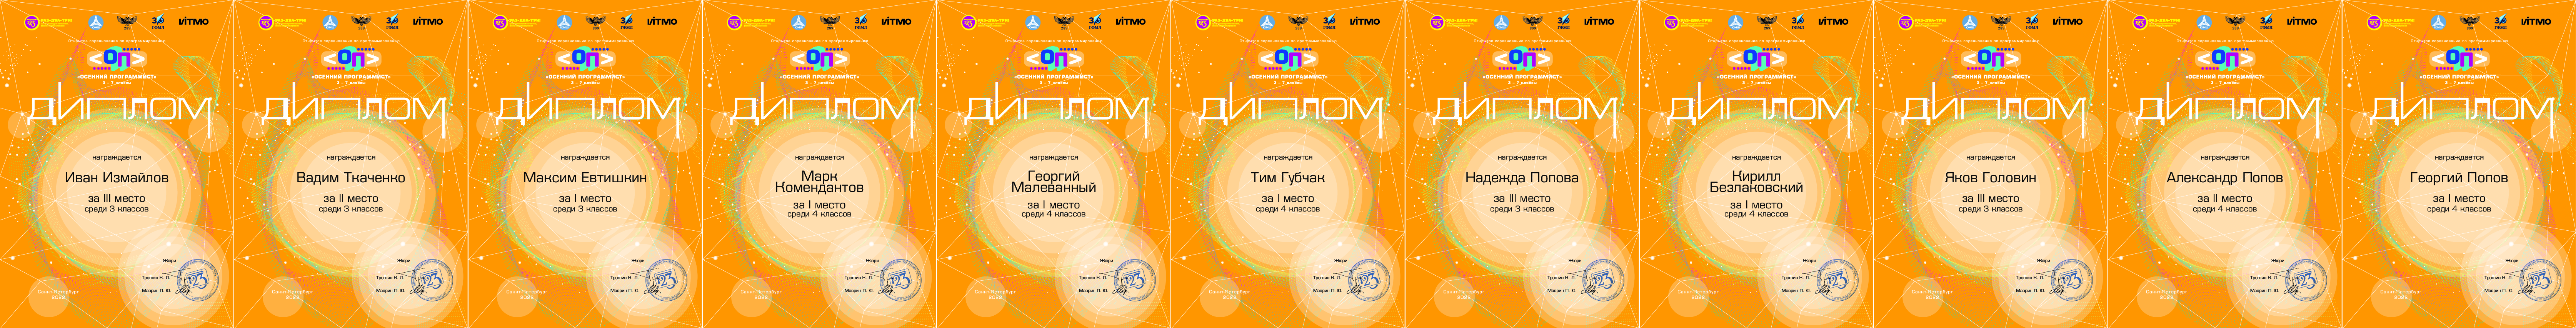

In [9]:
def make_certificate(r):
    if r.place == -1:
        return None, None

    certificate = certificates[0]
    font = "eurofontc"

    x = 51.0

    place = f"за {PLACES[r.place]} место"
    grade = f"среди {r.grade} классов"

    cert = CertificateFormer()
    cert.start(certificate.width, certificate.height)

    cert.add_centered_string("награждается", font, 20, 52.0, x=x)

    if len(r.name) + len(r.surname) < 15:
        cert.add_centered_string(r.name + ' ' + r.surname, font, 38, 45.0, x=x)
        cert.add_centered_string(place, font, 30, 39.0, x=x)
        cert.add_centered_string(grade, font, 22, 36.0, x=x)

    else:
        cert.add_centered_string(r.name, font, 38, 45.5, x=x)
        cert.add_centered_string(r.surname, font, 38, 42.0, x=x)
        cert.add_centered_string(place, font, 30, 37.0, x=x)
        cert.add_centered_string(grade, font, 22, 34.5, x=x)

    cert = cert.bake(certificate.get_page())

    return cert, (r.name + ' ' + r.surname)

test_certificate_folder = save_folder + "/test/"

printer = CertificatePrinter(test_certificate_folder)

for row in competition.data[:20].itertuples():
    sheet, name = make_certificate(row)
    if name is None:
        continue
    printer.print_certificate_one_sheet(sheet, name)

image_from_pdf_folder(test_certificate_folder)

In [10]:

if True:

    printer = CertificatePrinter(save_folder)

    for row in competition.data.itertuples():
        sheet, name = make_certificate(row)
        if name is None:
            continue
        printer.print_certificate_one_sheet(sheet, name)

    image_from_pdf_folder(test_certificate_folder)



Saving ./..////fall_2022//////new_certificates//////Максим Евтишкин.pdf
Saving ./..////fall_2022//////new_certificates//////Вадим Ткаченко.pdf
Saving ./..////fall_2022//////new_certificates//////Надежда Попова.pdf
Saving ./..////fall_2022//////new_certificates//////Яков Головин.pdf
Saving ./..////fall_2022//////new_certificates//////Иван Измайлов.pdf
Saving ./..////fall_2022//////new_certificates//////Георгий Малеванный.pdf
Saving ./..////fall_2022//////new_certificates//////Марк Комендантов.pdf
Saving ./..////fall_2022//////new_certificates//////Кирилл Безлаковский.pdf
Saving ./..////fall_2022//////new_certificates//////Тим Губчак.pdf
Saving ./..////fall_2022//////new_certificates//////Георгий Попов.pdf
Saving ./..////fall_2022//////new_certificates//////Александр Попов.pdf
Saving ./..////fall_2022//////new_certificates//////Виктория Андриенко.pdf
Saving ./..////fall_2022//////new_certificates//////Остапенко Михаил.pdf
Saving ./..////fall_2022//////new_certificates//////Роман Калита.p